# Test notebook for Pastas with PEST++ GLM and PEST HP Solver

## Packages

In [1]:
from pathlib import Path

import pandas as pd
import pastas as ps

import pastas_plugins.pest as psp

## Load Data

In [2]:
head = (
    pd.read_csv(
        "https://raw.githubusercontent.com/pastas/pastas/master/doc/examples/data/head_nb1.csv",
        index_col="date",
        parse_dates=True,
    ).squeeze()
).iloc[-300:]
prec = pd.read_csv(
    "https://raw.githubusercontent.com/pastas/pastas/master/doc/examples/data/rain_nb1.csv",
    index_col="date",
    parse_dates=True,
).squeeze()
evap = pd.read_csv(
    "https://raw.githubusercontent.com/pastas/pastas/master/doc/examples/data/evap_nb1.csv",
    index_col="date",
    parse_dates=True,
).squeeze()
pex = (prec - evap).dropna().rename("PrecipitationExcess")

## Create Model

In [3]:
ml = ps.Model(head, name="PestGLM")
sm = ps.StressModel(
    pex, ps.Exponential(), name="pex", settings=ps.rcParams["timeseries"]["evap"]
)
ml.add_stressmodel(sm)

### Solve with Pest GLM

In [4]:
solver = psp.PestGlmSolver(
    exe_name="bin/pestpp-glm",
    model_ws=Path("pestf_glm/model"),
    temp_ws=Path("pestf_glm/temp"),
    noptmax=100,
)
ml.solve(solver=solver, report=False)

2025-05-22 10:41:05.271140 starting: opening PstFrom.log for logging
2025-05-22 10:41:05.273665 starting PstFrom process
2025-05-22 10:41:05.273985 starting: setting up dirs
2025-05-22 10:41:05.275825 starting: removing existing new_d '/home/martin/repos/pastas-plugins/docs/examples/pestf_glm/temp'
2025-05-22 10:41:05.298324 finished: removing existing new_d '/home/martin/repos/pastas-plugins/docs/examples/pestf_glm/temp' took: 0:00:00.022499
2025-05-22 10:41:05.303355 starting: copying original_d '/home/martin/repos/pastas-plugins/docs/examples/pestf_glm/model' to new_d '/home/martin/repos/pastas-plugins/docs/examples/pestf_glm/temp'


2025-05-22 10:41:05.308842 finished: copying original_d '/home/martin/repos/pastas-plugins/docs/examples/pestf_glm/model' to new_d '/home/martin/repos/pastas-plugins/docs/examples/pestf_glm/temp' took: 0:00:00.005487
2025-05-22 10:41:05.312213 finished: setting up dirs took: 0:00:00.038228
2025-05-22 10:41:05.368745 starting: adding grid type d style parameters for file(s) ['parameters_sel.csv']
2025-05-22 10:41:05.371474 starting: loading list-style /home/martin/repos/pastas-plugins/docs/examples/pestf_glm/temp/parameters_sel.csv
2025-05-22 10:41:05.372697 starting: reading list-style file: /home/martin/repos/pastas-plugins/docs/examples/pestf_glm/temp/parameters_sel.csv
2025-05-22 10:41:05.377624 finished: reading list-style file: /home/martin/repos/pastas-plugins/docs/examples/pestf_glm/temp/parameters_sel.csv took: 0:00:00.004927
2025-05-22 10:41:05.379896 loaded list-style '/home/martin/repos/pastas-plugins/docs/examples/pestf_glm/temp/parameters_sel.csv' of shape (3, 2)
2025-05-2

/home/martin/repos/pyemu/pyemu/logger.py:100: PyemuWarning: 2025-05-22 10:41:05.466860 WARNING: add_py_function() command: run() is not being called directly



noptmax:0, npar_adj:3, nnz_obs:300
noptmax:100, npar_adj:3, nnz_obs:300


             pestpp-glm: a tool for GLM parameter estimation and FOSM uncertainty analysis

                                   by The PEST++ Development Team


version: 5.2.16
binary compiled on Dec  1 2024 at 10:51:08

started at 05/22/25 10:41:05
...processing command line: ' ./pestpp-glm pest.pst /h :4004'
...using panther run manager in master mode using port 4004

using control file: "pest.pst"

in directory: "/home/martin/repos/pastas-plugins/docs/examples/pestf_glm/temp"
on host: "VonkXPS15"

processing control file pest.pst


:~-._                                                 _.-~:
: :.~^o._        ________---------________        _.o^~.:.:
 : ::.`?88booo~~~.::::::::...::::::::::::..~~oood88P'.::.:
 :  ::: `?88P .:::....         ........:::::. ?88P' :::. :
  :  :::. `? .::.            . ...........:::. P' .:::. :
   :  :::   ... ..  ...       .. .::::......::.   :::. :
   `  :' .... ..  .:::::.     . .

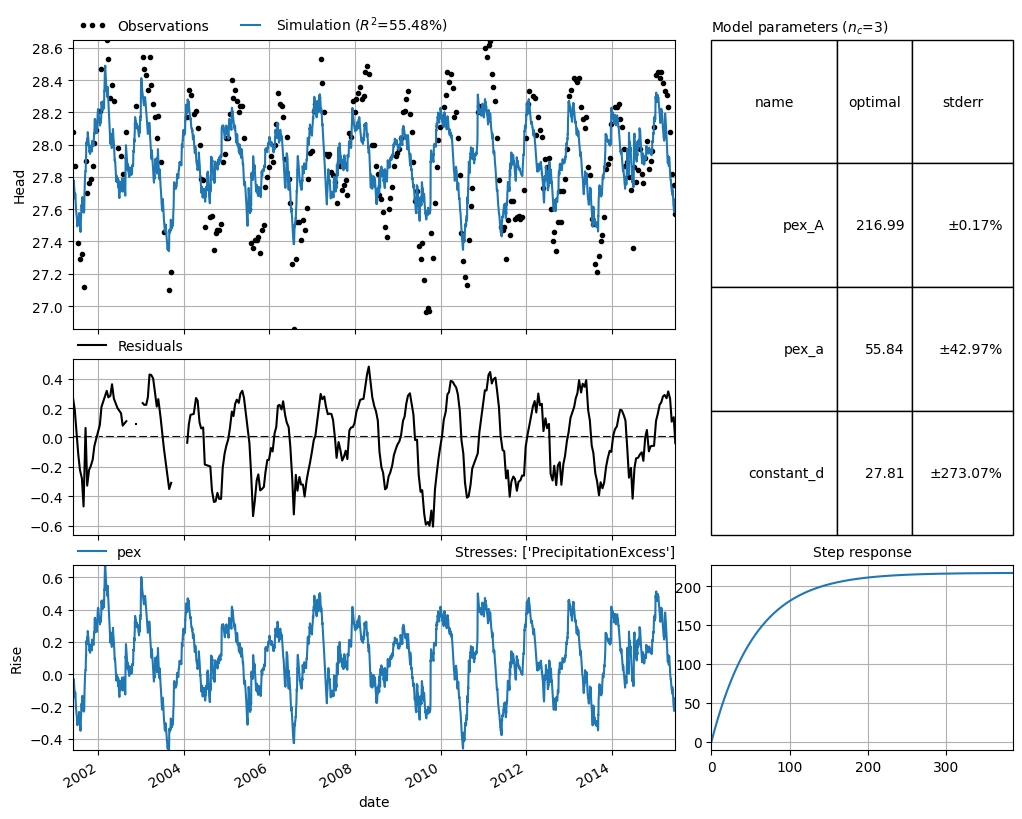

In [5]:
_ = ml.plots.results(stderr=True)

### Solve with Pest HP

In [6]:
ml_hp = ml.copy()
ml_hp.name = "PestHp"
control_data = dict(
    phiredstp=1e-3,
    nphistp=10,
    nphinored=10,
    relparstp=1e-3,
)

solver = psp.PestHpSolver(
    exe_name="bin/pest_hp",
    exe_agent="bin/agent_hp",
    model_ws=Path("pestf_hp/model"),
    temp_ws=Path("pestf_hp/temp"),
    noptmax=30,
    control_data=control_data,
)
ml_hp.add_solver(solver)
ml_hp.solve(solver=solver, report=False)

2025-05-22 10:42:33.696710 starting: opening PstFrom.log for logging
2025-05-22 10:42:33.697007 starting PstFrom process
2025-05-22 10:42:33.699300 starting: setting up dirs
2025-05-22 10:42:33.699706 starting: removing existing new_d '/home/martin/repos/pastas-plugins/docs/examples/pestf_hp/temp'
2025-05-22 10:42:33.705222 finished: removing existing new_d '/home/martin/repos/pastas-plugins/docs/examples/pestf_hp/temp' took: 0:00:00.005516
2025-05-22 10:42:33.705491 starting: copying original_d '/home/martin/repos/pastas-plugins/docs/examples/pestf_hp/model' to new_d '/home/martin/repos/pastas-plugins/docs/examples/pestf_hp/temp'
2025-05-22 10:42:33.715368 finished: copying original_d '/home/martin/repos/pastas-plugins/docs/examples/pestf_hp/model' to new_d '/home/martin/repos/pastas-plugins/docs/examples/pestf_hp/temp' took: 0:00:00.009877
2025-05-22 10:42:33.718729 finished: setting up dirs took: 0:00:00.019429
2025-05-22 10:42:33.778714 starting: adding grid type d style parameters

/home/martin/repos/pyemu/pyemu/logger.py:100: PyemuWarning: 2025-05-22 10:42:33.862185 WARNING: add_py_function() command: run() is not being called directly



2025-05-22 10:42:33.876515 starting: Converting parameters to shortnames
2025-05-22 10:42:33.881901 starting: Renaming parameters for shortnames


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


    find/replace long->short in /home/martin/repos/pastas-plugins/docs/examples/pestf_hp/temp/parameters_sel.csv.tpl
    find/replace long->short in /home/martin/repos/pastas-plugins/docs/examples/pestf_hp/temp/parameters_sel.csv.tpl... took  0.00 s
2025-05-22 10:42:35.650967 finished: Renaming parameters for shortnames took: 0:00:01.769066
2025-05-22 10:42:35.666290 finished: Converting parameters to shortnames took: 0:00:01.789775
2025-05-22 10:42:35.669965 starting: Converting observations to shortnames
2025-05-22 10:42:35.673475 starting: Renaming observations for shortnames


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


    find/replace long->short in /home/martin/repos/pastas-plugins/docs/examples/pestf_hp/temp/simulation.csv.ins
    find/replace long->short in /home/martin/repos/pastas-plugins/docs/examples/pestf_hp/temp/simulation.csv.ins... took  0.01 s
2025-05-22 10:42:37.364602 finished: Renaming observations for shortnames took: 0:00:01.691127
2025-05-22 10:42:37.381078 finished: Converting observations to shortnames took: 0:00:01.711113
noptmax:0, npar_adj:3, nnz_obs:300
noptmax:30, npar_adj:3, nnz_obs:300
./pest_hp pest.pst /h :4004

 PEST_HP Version 18.25. Watermark Numerical Computing.
./agent_hp pest.pst /h VonkXPS15:4004

 PEST is running in parameter estimation mode.

 AGENT_HP Version 18.25. Watermark Numerical Computing.

 Performing numerical speed test...

 PEST run record: case pest
 (See file pest.rec for full details.)

 Model command line: 
 python forward_run.py

 RUNNING MODEL FOR FIRST TIME .....

    Running model 1 time....

    Waiting for at least one agent to appear....
 

/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:42:40.064082
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:42:40.085492
starting arr mlt 2025-05-22 10:42:40.085596
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:42:40.085997


 Model run complete.
    - number of runs completed...
          1
    Sum of squared weighted residuals (ie phi) =   66.223    


 OPTIMISATION ITERATION NO.        : 1
    Model calls so far             : 1
    Starting phi for this iteration:   66.223    

    Calculating Jacobian matrix: running model 3 times .....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:42:42.929448
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:42:42.950683
starting arr mlt 2025-05-22 10:42:42.950755
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:42:42.951076


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:42:45.686279
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:42:45.706479
starting arr mlt 2025-05-22 10:42:45.706529
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:42:45.706767


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:42:48.358257
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:42:48.378599
starting arr mlt 2025-05-22 10:42:48.378656
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:42:48.378890


 Model run complete.
     3

    Parallelisation of lambda search: running model up to 3 times.....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:42:51.120172
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:42:51.153479
starting arr mlt 2025-05-22 10:42:51.153557
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:42:51.153890


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:42:53.817194
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:42:53.836674
starting arr mlt 2025-05-22 10:42:53.836735
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:42:53.837028


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:42:56.776063
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:42:56.798437
starting arr mlt 2025-05-22 10:42:56.798500
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:42:56.798768


 Model run complete.
     3

        Lambda =   2.2074     upgrade fraction =   1.0000     ----->
           Phi =   34.416      (  0.520 of starting phi)

        Lambda =   1.0246     upgrade fraction =   1.0000     ----->
           Phi =   34.082      (  0.515 of starting phi)

        Lambda =   4.7557     upgrade fraction =   1.0000     ----->
           Phi =   34.752      (  0.525 of starting phi)

    Maximum relative change:  1.156     ["p1"]


 OPTIMISATION ITERATION NO.        : 2
    Model calls so far             : 7
    Starting phi for this iteration:   34.082    

    Calculating Jacobian matrix: running model 3 times .....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:42:59.899472
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:42:59.918655
starting arr mlt 2025-05-22 10:42:59.918709
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:42:59.918925


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:02.535819
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:02.558003
starting arr mlt 2025-05-22 10:43:02.558075
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:02.558366


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:03.781809
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:03.805959
starting arr mlt 2025-05-22 10:43:03.806043
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:03.806354


 Model run complete.
     3

    Parallelisation of lambda search: running model up to 3 times.....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:06.603725
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:06.630745
starting arr mlt 2025-05-22 10:43:06.630812
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:06.631055


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:09.412430
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:09.432800
starting arr mlt 2025-05-22 10:43:09.432911
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:09.433556


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:12.111998
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:12.130403
starting arr mlt 2025-05-22 10:43:12.130452
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:12.130702


 Model run complete.
     3

        Lambda =  0.47557     upgrade fraction =   1.0000     ----->
           Phi =   18.820      (  0.552 of starting phi)

        Lambda =  0.23244     upgrade fraction =   1.0000     ----->
           Phi =   18.156      (  0.533 of starting phi)

        Lambda =  0.97303     upgrade fraction =   1.0000     ----->
           Phi =   19.618      (  0.576 of starting phi)

    Maximum relative change:  1.717     ["p1"]


 OPTIMISATION ITERATION NO.        : 3
    Model calls so far             : 13
    Starting phi for this iteration:   18.156    

    Calculating Jacobian matrix: running model 3 times .....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:14.730238
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:14.753845
starting arr mlt 2025-05-22 10:43:14.753893
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:14.754086


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:17.568100
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:17.588146
starting arr mlt 2025-05-22 10:43:17.588200
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:17.588411


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:20.432426
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:20.454266
starting arr mlt 2025-05-22 10:43:20.454346
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:20.454662


 Model run complete.
     3

    Parallelisation of lambda search: running model up to 3 times.....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:23.486558
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:23.512285
starting arr mlt 2025-05-22 10:43:23.512347
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:23.512592


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:26.484661
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:26.508219
starting arr mlt 2025-05-22 10:43:26.508287
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:26.508537


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:29.278162
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:29.298045
starting arr mlt 2025-05-22 10:43:29.298094
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:29.298291


 Model run complete.
     3

        Lambda =  0.11361     upgrade fraction =   1.0000     ----->
           Phi =   8.9037      (  0.490 of starting phi)

        Lambda =  5.68029E-02 upgrade fraction =   1.0000     ----->
           Phi =   8.6576      (  0.477 of starting phi)

        Lambda =  0.22721     upgrade fraction =   1.0000     ----->
           Phi =   9.3930      (  0.517 of starting phi)

    Maximum relative change:  1.833     ["p1"]


 OPTIMISATION ITERATION NO.        : 4
    Model calls so far             : 19
    Starting phi for this iteration:   8.6576    

    Calculating Jacobian matrix: running model 3 times .....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:32.274783
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:32.295485
starting arr mlt 2025-05-22 10:43:32.295533
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:32.295741


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:33.650161
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:33.672351
starting arr mlt 2025-05-22 10:43:33.672411
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:33.672665


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:36.502365
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:36.520657
starting arr mlt 2025-05-22 10:43:36.520714
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:36.521018


 Model run complete.
     3

    Parallelisation of lambda search: running model up to 3 times.....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:39.111841
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:39.129822
starting arr mlt 2025-05-22 10:43:39.129911
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:39.130161


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:41.796337
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:41.814967
starting arr mlt 2025-05-22 10:43:41.815018
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:41.815222


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:44.522825
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:44.544549
starting arr mlt 2025-05-22 10:43:44.544613
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:44.544879


 Model run complete.
     3

        Lambda =  2.84014E-02 upgrade fraction =   1.0000     ----->
           Phi =   4.9242      (  0.569 of starting phi)

        Lambda =  1.42007E-02 upgrade fraction =   1.0000     ----->
           Phi =   4.8848      (  0.564 of starting phi)

        Lambda =  5.68029E-02 upgrade fraction =   1.0000     ----->
           Phi =   5.0909      (  0.588 of starting phi)

    Maximum relative change: 0.4878     ["p0"]


 OPTIMISATION ITERATION NO.        : 5
    Model calls so far             : 25
    Starting phi for this iteration:   4.8848    

    Calculating Jacobian matrix: running model 3 times .....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:47.355860
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:47.374463
starting arr mlt 2025-05-22 10:43:47.374514
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:47.374716


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:50.049809
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:50.069227
starting arr mlt 2025-05-22 10:43:50.069275
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:50.069478


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:52.829285
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:52.848184
starting arr mlt 2025-05-22 10:43:52.848236
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:52.848431


 Model run complete.
     3

    Parallelisation of lambda search: running model up to 3 times.....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:55.612989
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:55.636428
starting arr mlt 2025-05-22 10:43:55.636490
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:55.636756


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:43:58.608279
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:43:58.626414
starting arr mlt 2025-05-22 10:43:58.626485
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:43:58.626716


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:01.402233
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:01.420334
starting arr mlt 2025-05-22 10:44:01.420483
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:01.420676


 Model run complete.
     3

        Lambda =  7.10036E-03 upgrade fraction =   1.0000     ----->
           Phi =   4.8722      (  0.997 of starting phi)

        Lambda =  3.55018E-03 upgrade fraction =   1.0000     ----->
           Phi =   4.8722      (  0.997 of starting phi)

        Lambda =  1.42007E-02 upgrade fraction =   1.0000     ----->
           Phi =   4.8722      (  0.997 of starting phi)

    Relative phi reduction between optimisation iterations less than 0.1000
    Switch to higher order derivatives calculation
    Split slope derivatives analysis begins during next iteration

    Maximum relative change: 4.3184E-02 ["p1"]


 OPTIMISATION ITERATION NO.        : 6
    Model calls so far             : 31
    Starting phi for this iteration:   4.8722    

    Calculating Jacobian matrix: running model 6 times .....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:04.376809
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:04.404349
starting arr mlt 2025-05-22 10:44:04.404493
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:04.405138


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:05.664817
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:05.683683
starting arr mlt 2025-05-22 10:44:05.683737
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:05.683938


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:08.279591
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:08.298937
starting arr mlt 2025-05-22 10:44:08.298991
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:08.299267


 Model run complete.
     3
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:10.893858
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:10.916646
starting arr mlt 2025-05-22 10:44:10.916737
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:10.917090


 Model run complete.
     4
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:13.913589
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:13.939173
starting arr mlt 2025-05-22 10:44:13.939232
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:13.939456


 Model run complete.
     5
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:16.860273
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:16.882660
starting arr mlt 2025-05-22 10:44:16.882745
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:16.883063


 Model run complete.
     6

    Parallelisation of lambda search: running model up to 3 times.....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:19.494815
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:19.513106
starting arr mlt 2025-05-22 10:44:19.513163
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:19.513398


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:22.103525
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:22.122673
starting arr mlt 2025-05-22 10:44:22.122727
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:22.122921


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:24.827902
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:24.846168
starting arr mlt 2025-05-22 10:44:24.846246
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:24.846463


 Model run complete.
     3

        Lambda =  7.10036E-03 upgrade fraction =   1.0000     ----->
           Phi =   4.8719      (  1.000 of starting phi)

        Lambda =  3.55018E-03 upgrade fraction =   1.0000     ----->
           Phi =   4.8719      (  1.000 of starting phi)

        Lambda =  1.42007E-02 upgrade fraction =   1.0000     ----->
           Phi =   4.8719      (  1.000 of starting phi)

    Maximum relative change: 7.9581E-03 ["p1"]


 OPTIMISATION ITERATION NO.        : 7
    Model calls so far             : 40
    Starting phi for this iteration:   4.8719    

    Calculating Jacobian matrix: running model 6 times .....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:27.567604
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:27.584997
starting arr mlt 2025-05-22 10:44:27.585058
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:27.585335


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:30.358300
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:30.378716
starting arr mlt 2025-05-22 10:44:30.378772
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:30.378988


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:33.255169
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:33.278430
starting arr mlt 2025-05-22 10:44:33.278509
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:33.278833


 Model run complete.
     3
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:34.470603
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:34.489024
starting arr mlt 2025-05-22 10:44:34.489071
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:34.489286


 Model run complete.
     4
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:37.141929
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:37.162650
starting arr mlt 2025-05-22 10:44:37.162710
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:37.163065


 Model run complete.
     5
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:39.923314
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:39.943645
starting arr mlt 2025-05-22 10:44:39.943701
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:39.943931


 Model run complete.
     6

    Parallelisation of lambda search: running model up to 3 times.....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:42.885624
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:42.907778
starting arr mlt 2025-05-22 10:44:42.907841
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:42.908103


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:45.756483
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:45.785577
starting arr mlt 2025-05-22 10:44:45.785633
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:45.785883


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:48.651726
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:48.670933
starting arr mlt 2025-05-22 10:44:48.670991
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:48.671198


 Model run complete.
     3

        Lambda =  1.77509E-03 upgrade fraction =   1.0000     ----->
           Phi =   4.8721      (  1.000 times starting phi)

        Lambda =  5.86869E-04 upgrade fraction =   1.0000     ----->
           Phi =   4.8721      (  1.000 times starting phi)

        Lambda =  5.36908E-03 upgrade fraction =   1.0000     ----->
           Phi =   4.8721      (  1.000 times starting phi)

    Maximum relative change: 1.6414E-03 ["p1"]


 OPTIMISATION ITERATION NO.        : 8
    Model calls so far             : 49
    Starting phi for this iteration:   4.8721    

    Calculating Jacobian matrix: running model 6 times .....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:51.228550
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:51.250881
starting arr mlt 2025-05-22 10:44:51.250950
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:51.251250


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:53.872720
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:53.892870
starting arr mlt 2025-05-22 10:44:53.892937
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:53.893282


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:56.526029
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:56.555088
starting arr mlt 2025-05-22 10:44:56.555144
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:56.555394


 Model run complete.
     3
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:44:59.308650
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:44:59.330538
starting arr mlt 2025-05-22 10:44:59.330611
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:44:59.330885


 Model run complete.
     4
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:01.993304
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:02.012028
starting arr mlt 2025-05-22 10:45:02.012111
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:02.012467


 Model run complete.
     5
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:04.950476
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:04.982157
starting arr mlt 2025-05-22 10:45:04.982279
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:04.982703


 Model run complete.
     6

    Parallelisation of lambda search: running model up to 3 times.....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:06.525159
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:06.546973
starting arr mlt 2025-05-22 10:45:06.547042
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:06.547320


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:09.401383
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:09.421604
starting arr mlt 2025-05-22 10:45:09.421663
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:09.421959


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:12.525548
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:12.553369
starting arr mlt 2025-05-22 10:45:12.553486
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:12.553988


 Model run complete.
     3

        Lambda =  1.94027E-04 upgrade fraction =   1.0000     ----->
           Phi =   4.8722      (  1.000 times starting phi)

        Lambda =  4.43556E-05 upgrade fraction =   1.0000     ----->
           Phi =   4.8722      (  1.000 times starting phi)

        Lambda =  8.48739E-04 upgrade fraction =   1.0000     ----->
           Phi =   4.8722      (  1.000 times starting phi)

    Maximum relative change: 5.5003E-04 ["p1"]


 OPTIMISATION ITERATION NO.        : 9
    Model calls so far             : 58
    Starting phi for this iteration:   4.8722    

    Calculating Jacobian matrix: running model 6 times .....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:15.570412
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:15.590906
starting arr mlt 2025-05-22 10:45:15.590965
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:15.591197


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:18.491907
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:18.512130
starting arr mlt 2025-05-22 10:45:18.512185
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:18.512406


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:21.231924
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:21.268393
starting arr mlt 2025-05-22 10:45:21.268470
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:21.268793


 Model run complete.
     3
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:24.148359
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:24.168851
starting arr mlt 2025-05-22 10:45:24.168940
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:24.169146


 Model run complete.
     4
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:27.173219
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:27.207212
starting arr mlt 2025-05-22 10:45:27.207312
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:27.207777


 Model run complete.
     5
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:30.066385
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:30.085116
starting arr mlt 2025-05-22 10:45:30.085234
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:30.085462


 Model run complete.
     6

    Parallelisation of lambda search: running model up to 3 times.....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:32.846991
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:32.866797
starting arr mlt 2025-05-22 10:45:32.866853
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:32.867100


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:35.487240
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:35.506438
starting arr mlt 2025-05-22 10:45:35.506496
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:35.506714


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:36.616670
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:36.635772
starting arr mlt 2025-05-22 10:45:36.635847
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:36.636053


 Model run complete.
     3

        Lambda =  4.43556E-05 upgrade fraction =   1.0000     ----->
           Phi =   4.8722      (  1.000 of starting phi)

        Lambda =  6.20006E-06 upgrade fraction =   1.0000     ----->
           Phi =   4.8722      (  1.000 of starting phi)

        Lambda =  3.17323E-04 upgrade fraction =   1.0000     ----->
           Phi =   4.8722      (  1.000 of starting phi)

    Maximum relative change: 1.9987E-04 ["p1"]


 OPTIMISATION ITERATION NO.        : 10
    Model calls so far             : 67
    Starting phi for this iteration:   4.8722    

    Calculating Jacobian matrix: running model 6 times .....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:39.276199
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:39.294494
starting arr mlt 2025-05-22 10:45:39.294554
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:39.294750


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:41.965912
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:41.984618
starting arr mlt 2025-05-22 10:45:41.984701
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:41.984896


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:44.553619
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:44.572260
starting arr mlt 2025-05-22 10:45:44.572336
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:44.572579


 Model run complete.
     3
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:47.216511
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:47.235540
starting arr mlt 2025-05-22 10:45:47.235598
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:47.235849


 Model run complete.
     4
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:49.838272
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:49.857460
starting arr mlt 2025-05-22 10:45:49.857523
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:49.857732


 Model run complete.
     5
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:52.435518
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:52.454926
starting arr mlt 2025-05-22 10:45:52.454996
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:52.455200


 Model run complete.
     6

    Parallelisation of lambda search: running model up to 3 times.....

 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:55.121087
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:55.140048
starting arr mlt 2025-05-22 10:45:55.140124
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:55.140394


 Model run complete.
    - number of runs completed...
          1
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:45:57.719228
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:45:57.737936
starting arr mlt 2025-05-22 10:45:57.738000
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:45:57.738201


 Model run complete.
     2
 Running model ....


/home/martin/repos/pyemu/pyemu/__init__.py:29: UserWarning: Failed to import legacy module. May impact ability to access older methods.ModuleNotFoundError No module named 'flopy'


error removing tmp file:simulation.csv
starting list mlt 2025-05-22 10:46:00.319930
number of chunks to process: 1
null mlt file for org_file 'org/parameters_sel.csv', continuing...
process 0  processed  1 process_list_file calls
finished list mlt 2025-05-22 10:46:00.339273
starting arr mlt 2025-05-22 10:46:00.339323
number of chunks to process: 1
process 0  processed  0 process_array_file calls
finished arr mlt 2025-05-22 10:46:00.339525


 Model run complete.
     3

        Lambda =  8.66649E-07 upgrade fraction =   1.0000     ----->
           Phi =   4.8722      (  1.000 of starting phi)

        Lambda =  3.26280E-08 upgrade fraction =   1.0000     ----->
           Phi =   4.8722      (  1.000 of starting phi)

        Lambda =  2.30195E-05 upgrade fraction =   1.0000     ----->
           Phi =   4.8722      (  1.000 of starting phi)

    Maximum relative change: 1.1589E-04 ["p1"]

    Optimisation complete: relative parameter change less than 1.0000E-03
                           over  3 successive iterations.
    Total model calls:     76

 ******************************************************************************

 Note carefully:-

 PEST-HP does not run the model one last time with optimised parameters.

 Optimised parameters are recorded in file pest.par.

 Use PARREP with this file, together with PEST control file, to build a
 new PEST control file with these optimised parameters.

 Then set NOPTMAX in t

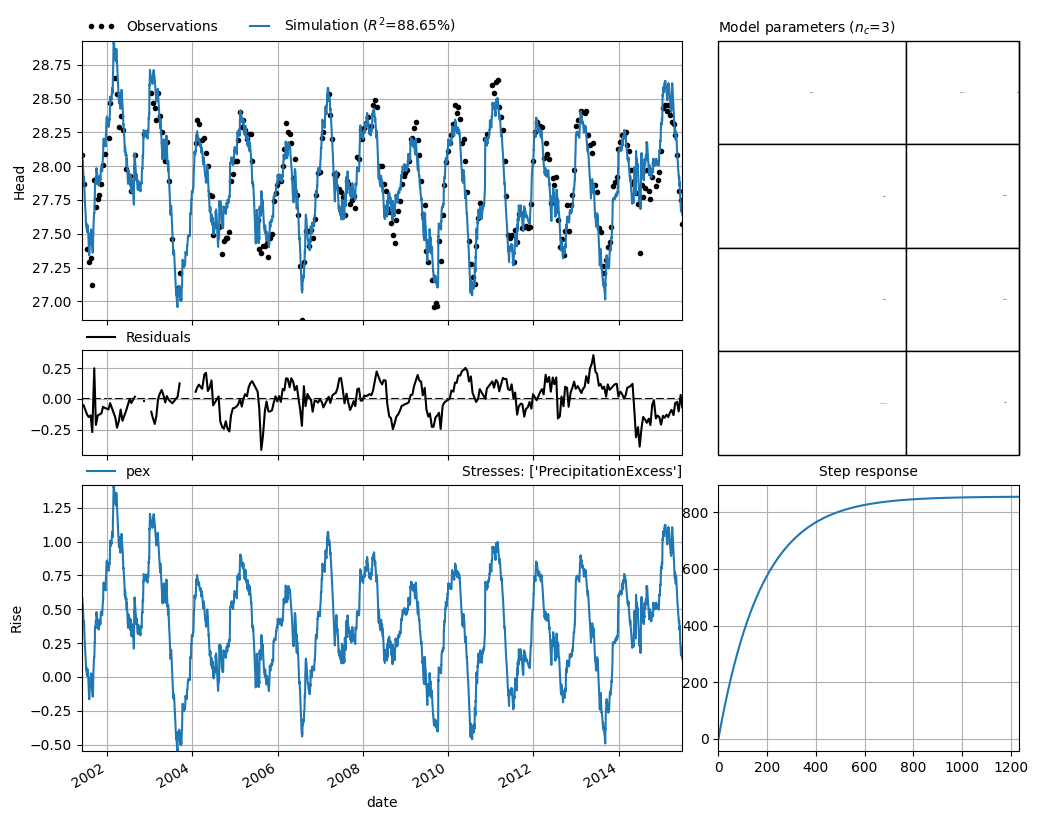

In [7]:
_ = ml_hp.plots.results(stderr=True)

### Solve with SciPy Least Squares

Fit report LeastSquares           Fit Statistics
nfev    24                     EVP         88.65
nobs    300                    R2           0.89
noise   False                  RMSE         0.13
tmin    2001-05-28 00:00:00    AICc     -1229.99
tmax    2015-06-28 00:00:00    BIC      -1218.96
freq    D                      Obj          2.44
warmup  3650 days 00:00:00     ___              
solver  LeastSquares           Interp.        No

Parameters (3 optimized)
               optimal     initial  vary
pex_A       850.962830  215.674528  True
pex_a       177.192187   10.000000  True
constant_d   27.508771   27.902000  True

Warnings! (1)
Response tmax for 'pex' > than warmup period.


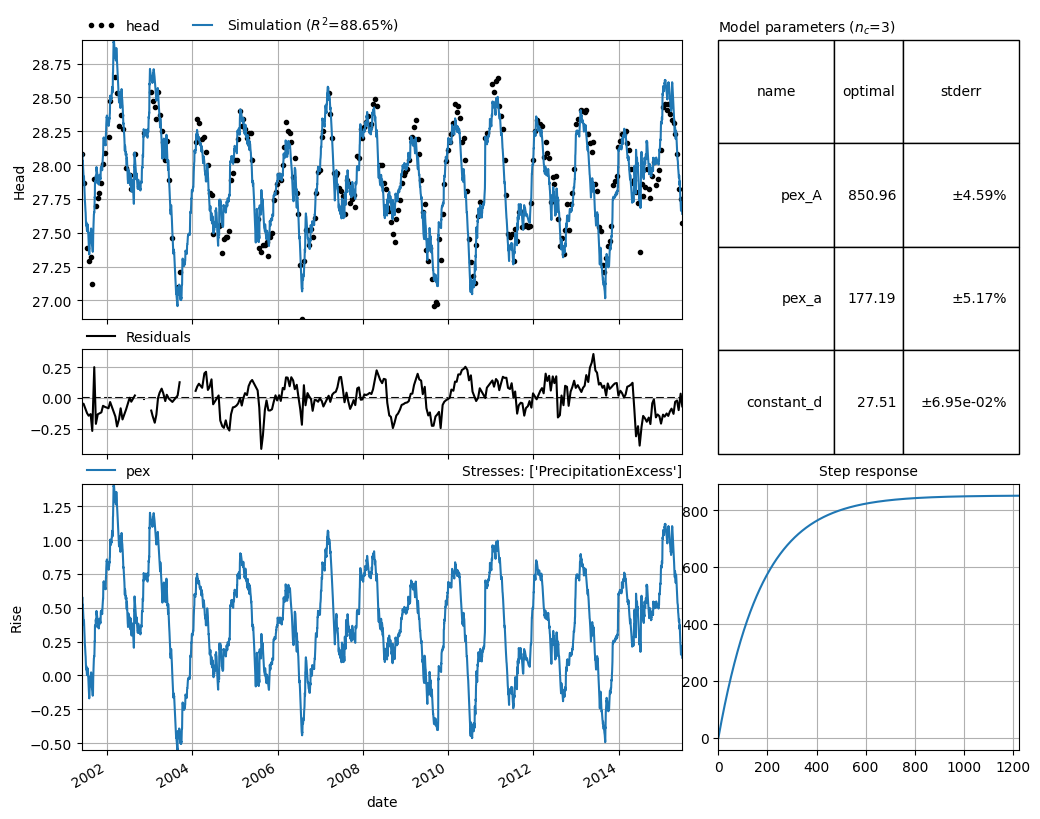

In [8]:
ml_ls = ml.copy()
ml_ls.name = "LeastSquares"
ml_ls.solve(solver=ps.LeastSquares())
_ = ml_ls.plots.results(stderr=True)

## Compare Results

### Plot

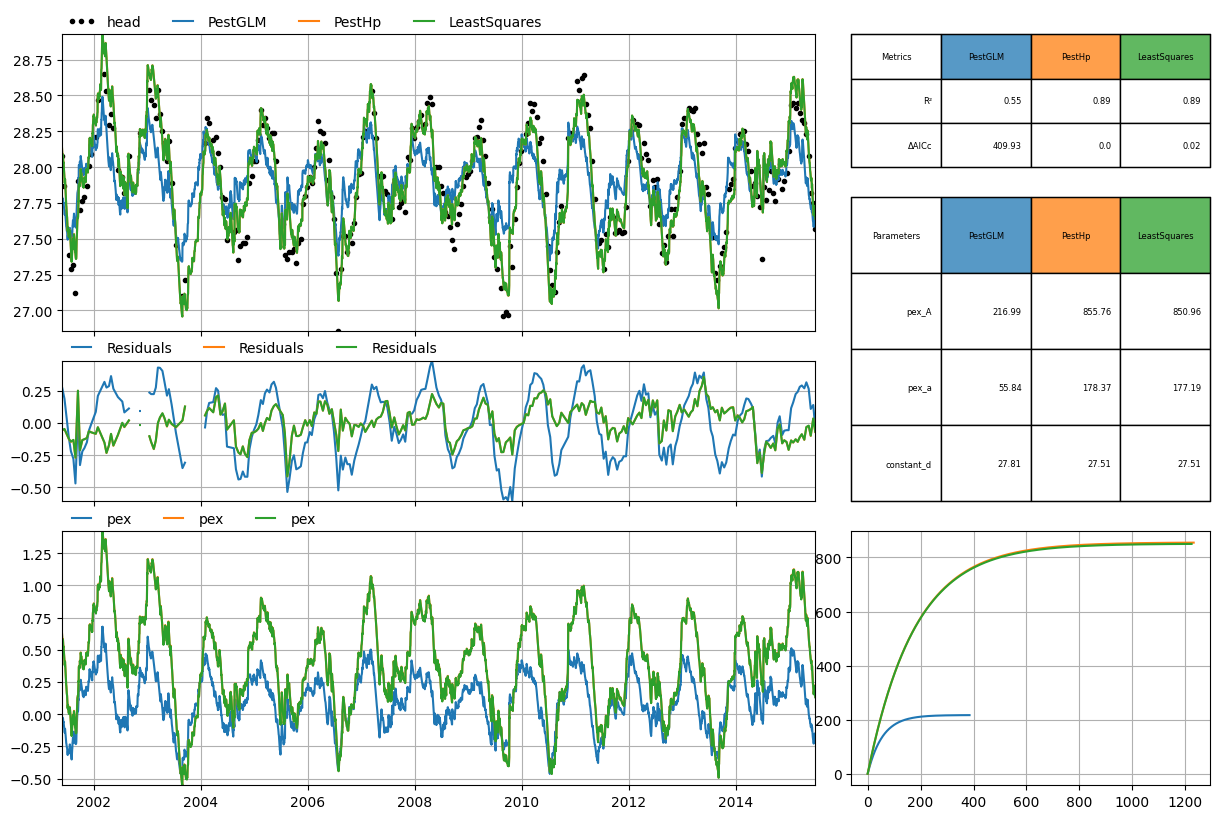

In [9]:
ps.plots.compare([ml, ml_hp, ml_ls], figsize=(12.0, 8.0));

### Fit metrics

In [11]:
pd.concat(
    [ml.stats.summary(), ml_hp.stats.summary(), ml_ls.stats.summary()],
    axis=1,
    keys=[ml.name, ml_hp.name, ml_ls.name],
)

,PestGLM,PestHp,LeastSquares
,Value,Value,Value
Statistic,,,
rmse,0.252351,0.127435,0.127439
sse,19.104335,4.871924,4.872239
mae,0.217138,0.103360,0.103323
nse,0.554777,0.886461,0.886453
evp,55.511346,88.646075,88.645341
rsq,0.554777,0.886461,0.886453
kge,0.488214,0.917282,0.916994
bic,-809.048810,-1218.976723,-1218.957332


### Parameters (and stderr)

In [12]:
pd.concat(
    [
        ml.parameters.loc[:, ["optimal", "stderr"]],
        ml_hp.parameters.loc[:, ["optimal", "stderr"]],
        ml_ls.parameters.loc[:, ["optimal", "stderr"]],
    ],
    axis=1,
    keys=[ml.name, ml_hp.name, ml_ls.name],
)

PestGLM                 PestHp        LeastSquares           
             optimal     stderr     optimal stderr      optimal     stderr
pex_A       216.9860   0.370954  855.763330    NaN   850.962830  39.066257
pex_a        55.8428  23.995083  178.369950    NaN   177.192187   9.167991
constant_d   27.8103  75.941622   27.506585    NaN    27.508771   0.019113

Standard error for the PestGlm optimization seems a bit too small. The PestHp does not have a standarderror, nor a covariance matrix (`pcov`). PestHp does have parameter sensitivy values but I'm not sure how to interpet those.

### Covariance matrices

In [13]:
pd.concat([ml.solver.pcov, ml_ls.solver.pcov], axis=1, keys=[ml.name, ml_ls.name])

PestGLM                        LeastSquares                       
                pex_A       pex_a constant_d        pex_A       pex_a constant_d
pex_A        0.137607     8.22671    23.6375  1526.172452  319.381256  -0.688454
pex_a        8.226710   575.76400  1108.2200   319.381256   84.052060  -0.143167
constant_d  23.637500  1108.22000  5767.1300    -0.688454   -0.143167   0.000365